<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/3)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20within%20same%20backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps
    - You will use gluoncv mxnet backend
    - Train three classifiers by changing parameter - base mode
    - No need to focus on how to change hyper-parameters, will be dealt later
    - Compare the three experiments

### Why compare experiments

    - One usually runs mulitple experiments on the same data by changing hyper-params, base model, etc
    
    - Hence this compare exxperiments feature helps to see which combination og params works the best for that data

# Table of Contents


## [Install](#0)


## [Train a classifier using Resnet18](#1)


## [Train a classifier using Densenet121 ](#2)


## [Train a classifier using Mobilenet V3](#3)


## [Compare experiments](#4)


## [Visualize and study comparison metrics](#5)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Malarial cell images
    - Credits: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC" -O malaria_cell.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq malaria_cell.zip

# Imports 

    - Using single mxnet-gluoncv backend for this tutorial

In [1]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

<a id='1'></a>
# Train a classifier using Resnet18

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [2]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-resnet18");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-resnet18
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-resnet18
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [3]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet18_v2", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v2
        Num of potentially trainable layers:  40
        Nu

/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [4]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------





    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.727, Train-loss: 0.669 | Val-acc: 0.829752, Val-loss: 0.443, | time: 4.0 sec

    Epoch 2/5
    ----------





    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.787, Train-loss: 0.561 | Val-acc: 0.857851, Val-loss: 0.349, | time: 4.1 sec

    Epoch 3/5
    ----------





    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.773, Train-loss: 0.584 | Val-acc: 0.844628, Val-loss: 0.405, | time: 3.9 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.787, Train-loss: 0.580 | Val-acc: 0.856198, Val-loss: 0.349, | time: 3.8 sec

    Epoch 5/5
    ----------





    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.784, Train-loss: 0.534 | Val-acc: 0.836364, Val-loss: 0.436, | time: 3.9 sec

    Training completed in: 0m 17s
    Best val Acc:          0.857851

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/output/models/
    Log Dir:     /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Train a classifier using Densenet121

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [5]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-densenet121");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-densenet121
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-densenet121
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [6]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="densenet121", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  242
        N

/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.731, Train-loss: 0.694 | Val-acc: 0.824793, Val-loss: 0.417, | time: 9.2 sec

    Epoch 2/5
    ----------





    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.782, Train-loss: 0.594 | Val-acc: 0.776860, Val-loss: 0.666, | time: 8.8 sec

    Epoch 3/5
    ----------





    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.806, Train-loss: 0.581 | Val-acc: 0.849587, Val-loss: 0.386, | time: 8.9 sec

    Epoch 4/5
    ----------





    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.814, Train-loss: 0.535 | Val-acc: 0.804959, Val-loss: 0.540, | time: 8.7 sec

    Epoch 5/5
    ----------





    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.782, Train-loss: 0.616 | Val-acc: 0.809917, Val-loss: 0.468, | time: 8.7 sec

    Training completed in: 0m 41s
    Best val Acc:          0.849587

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/output/models/
    Log Dir:     /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Train a classifier using Mobilenet-v3

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [8]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-movilenet-v3");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-movilenet-v3
    Dir: /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-mobilenet-v3
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [9]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="mobilenetv3_small", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   8
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           mobilenetv3_small
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model


100%|██████████| 11568/11568 [00:00<00:00, 22616.40KB/s]


    Model Loaded on device
        Model name:                           mobilenetv3_small
        Num of potentially trainable layers:  88
        Num of actual trainable layers:       1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0.9, 'weight_decay': 4e-05, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.97, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
/home/ubuntu/.virtualenvs/monk_pip_test/lib/python3.6/site-packages/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.843, Train-loss: 0.383 | Val-acc: 0.904132, Val-loss: 0.321, | time: 32.4 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0097
    [Epoch 2] Train-acc: 0.894, Train-loss: 0.282 | Val-acc: 0.897521, Val-loss: 0.302, | time: 32.4 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009409
    [Epoch 3] Train-acc: 0.910, Train-loss: 0.298 | Val-acc: 0.880992, Val-loss: 0.381, | time: 32.3 sec

    Epoch 4/5
    ----------




    curr_lr - 0.00912673
    [Epoch 4] Train-acc: 0.902, Train-loss: 0.291 | Val-acc: 0.909091, Val-loss: 0.310, | time: 32.0 sec

    Epoch 5/5
    ----------




    curr_lr - 0.008852928099999999
    [Epoch 5] Train-acc: 0.884, Train-loss: 0.321 | Val-acc: 0.871074, Val-loss: 0.329, | time: 32.6 sec

    Training completed in: 2m 40s
    Best val Acc:          0.909091

Training End

Training Outputs
    Model Dir:   /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/output/models/
    Log Dir:     /home/ubuntu/Desktop/monk_pip_test/monk_v1/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
  

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Compare experiments

In [11]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [12]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Sample-Comparison-1");

Comparison: - Sample-Comparison-1


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Sample-Comparison-1
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [13]:
gtf.Add_Experiment("Malaria-Cell", "exp-resnet18");
gtf.Add_Experiment("Malaria-Cell", "exp-densenet121");
gtf.Add_Experiment("Malaria-Cell", "exp-movilenet-v3");

Project - Malaria-Cell, Experiment - exp-resnet18 added
Project - Malaria-Cell, Experiment - exp-densenet121 added
Project - Malaria-Cell, Experiment - exp-movilenet-v3 added


### Run Analysis

In [14]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<a id='5'></a>
# Visualize and study comparison metrics

### Training Accuracy Curves

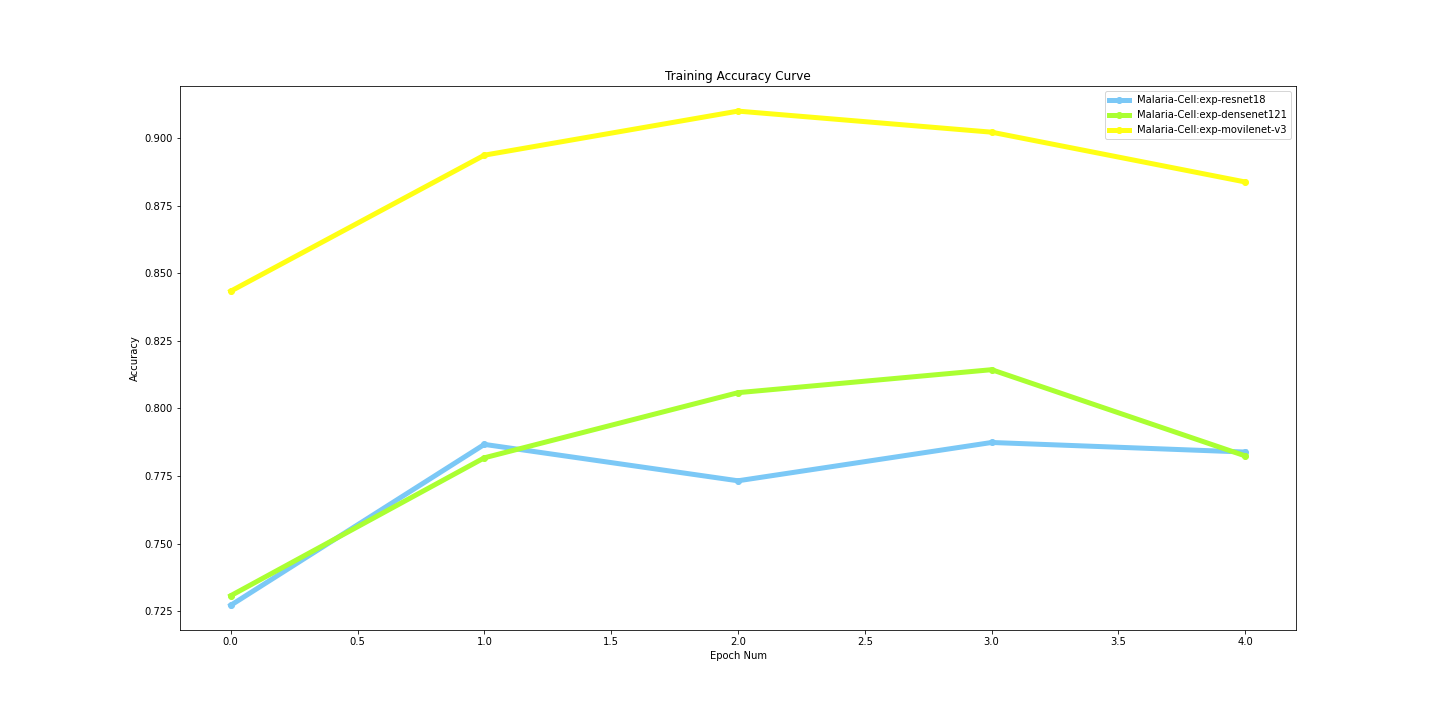

In [15]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/train_accuracy.png") 

### Training Loss Curves

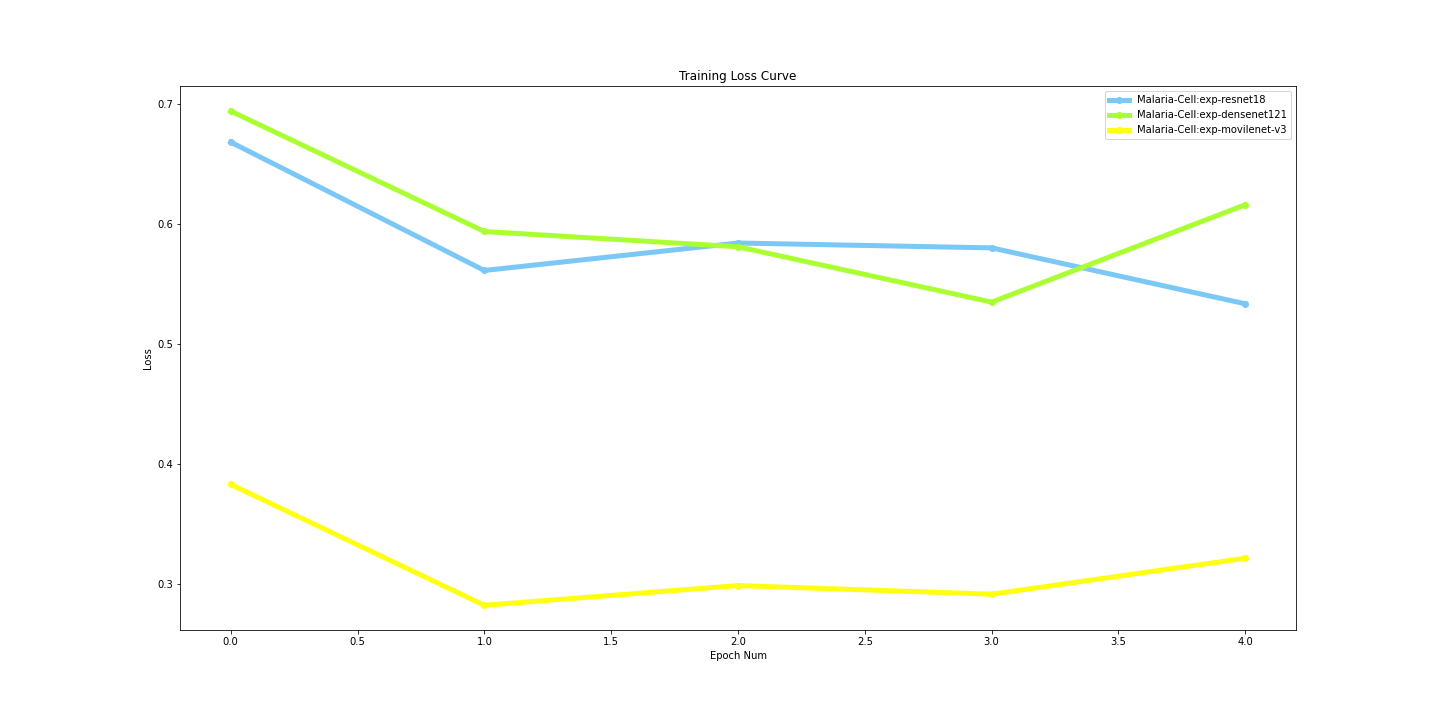

In [16]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/train_loss.png") 

### Validation Accuracy Curves

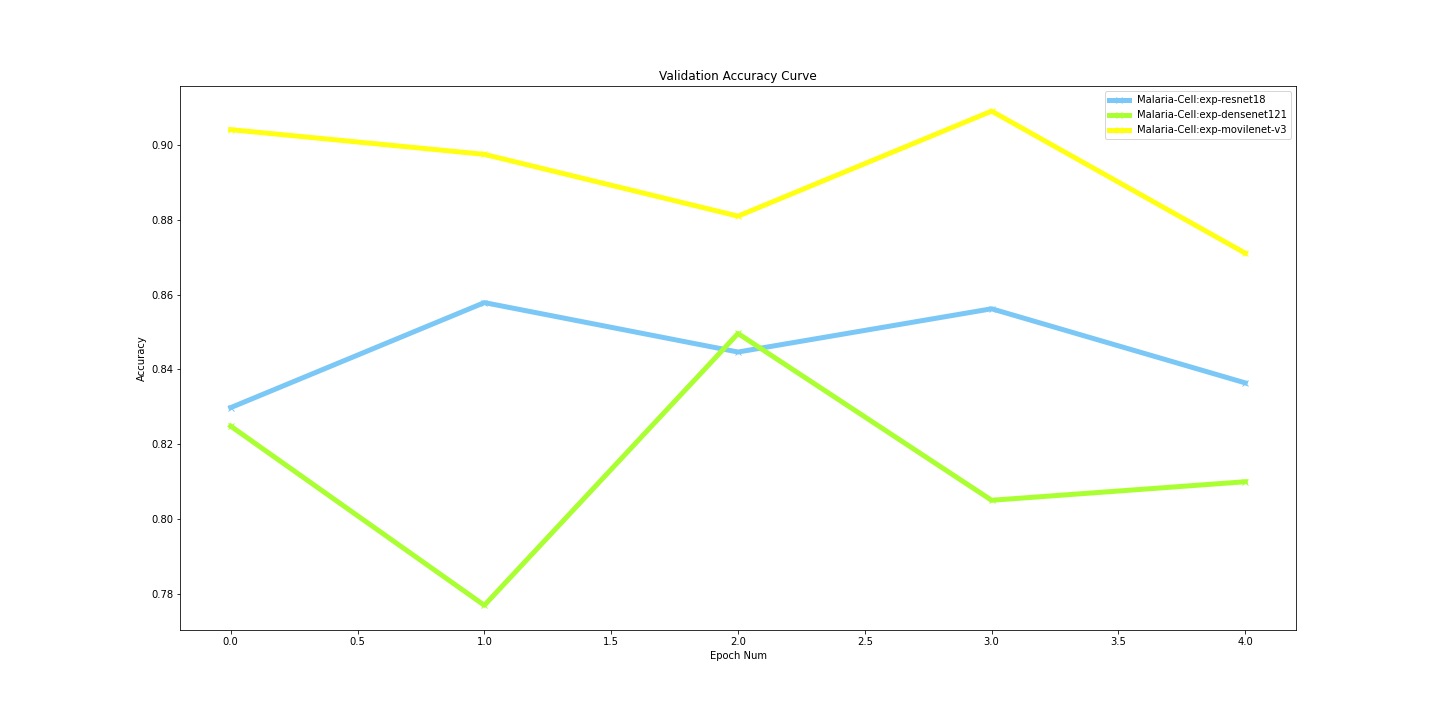

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/val_accuracy.png") 

### Validation loss curves

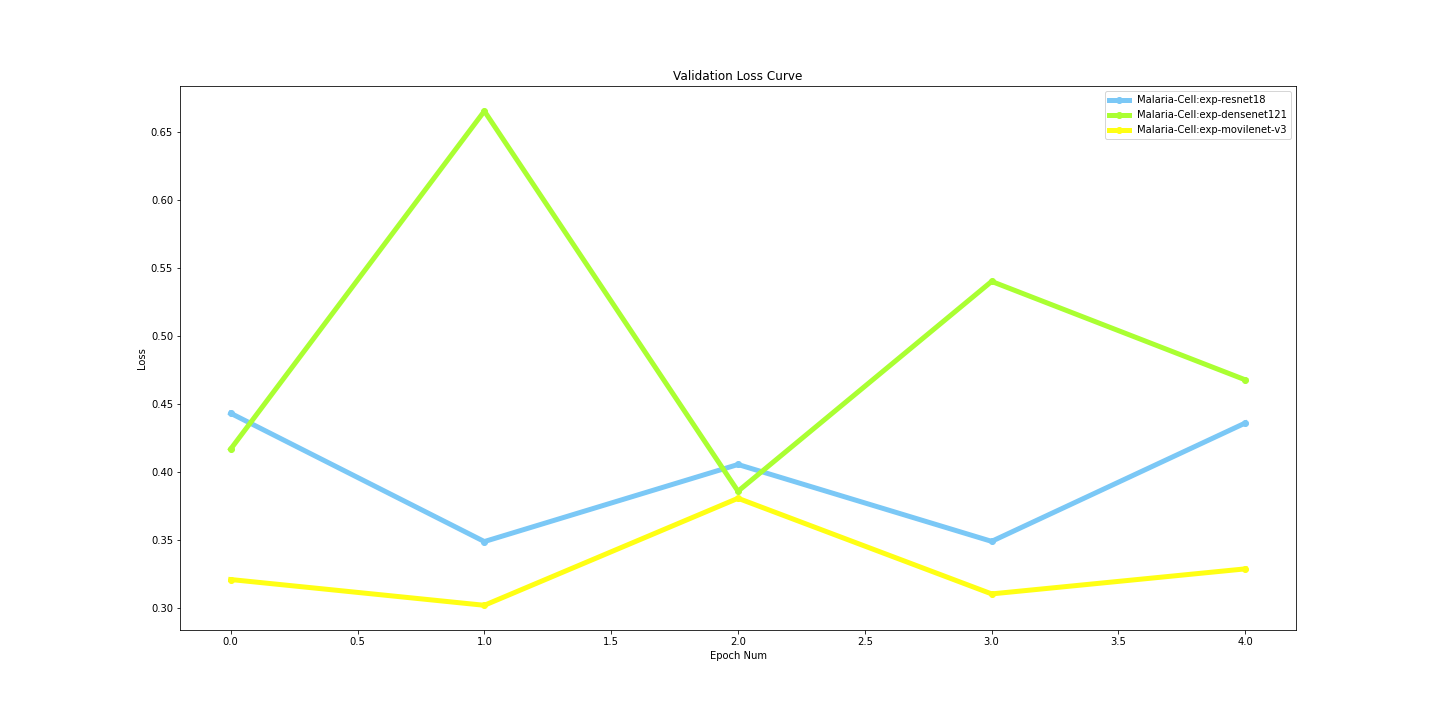

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/val_loss.png") 

### Training time curves

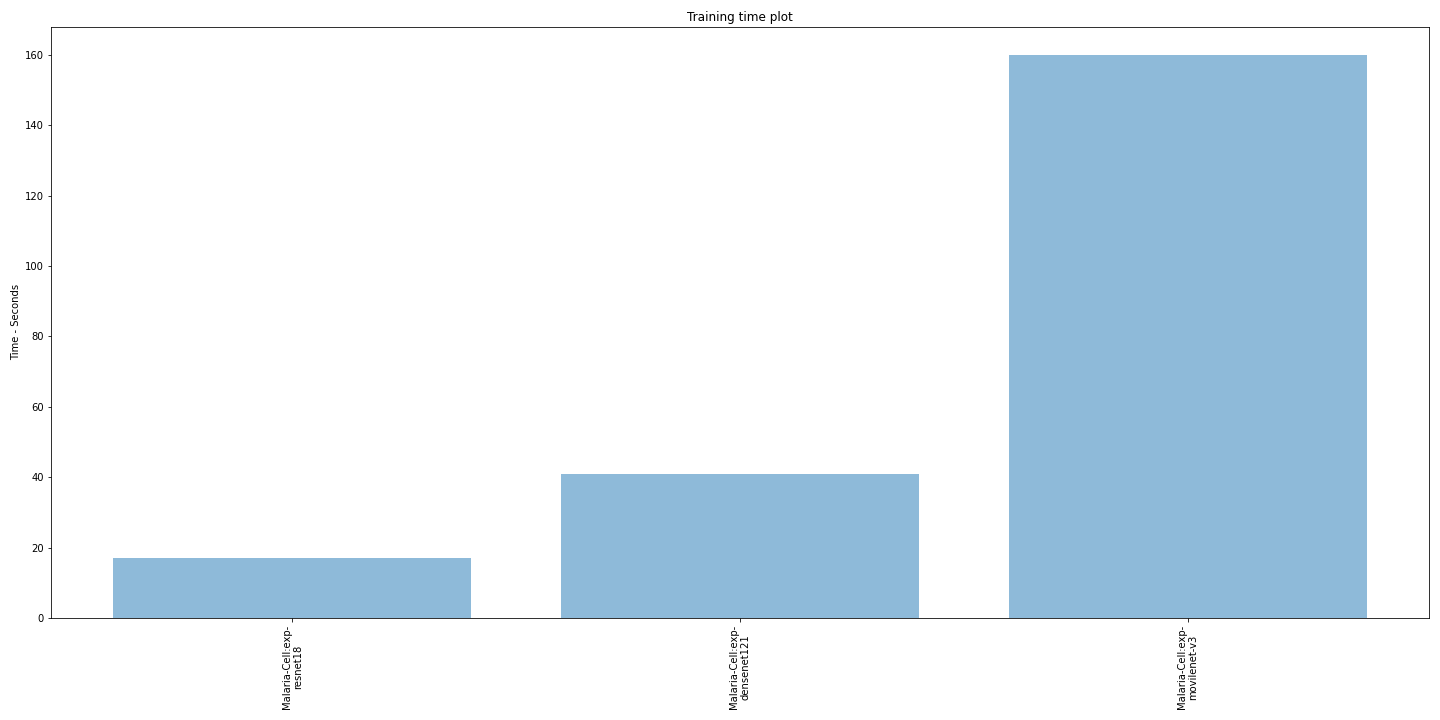

In [19]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_training_time.png") 

### Max GPU usages

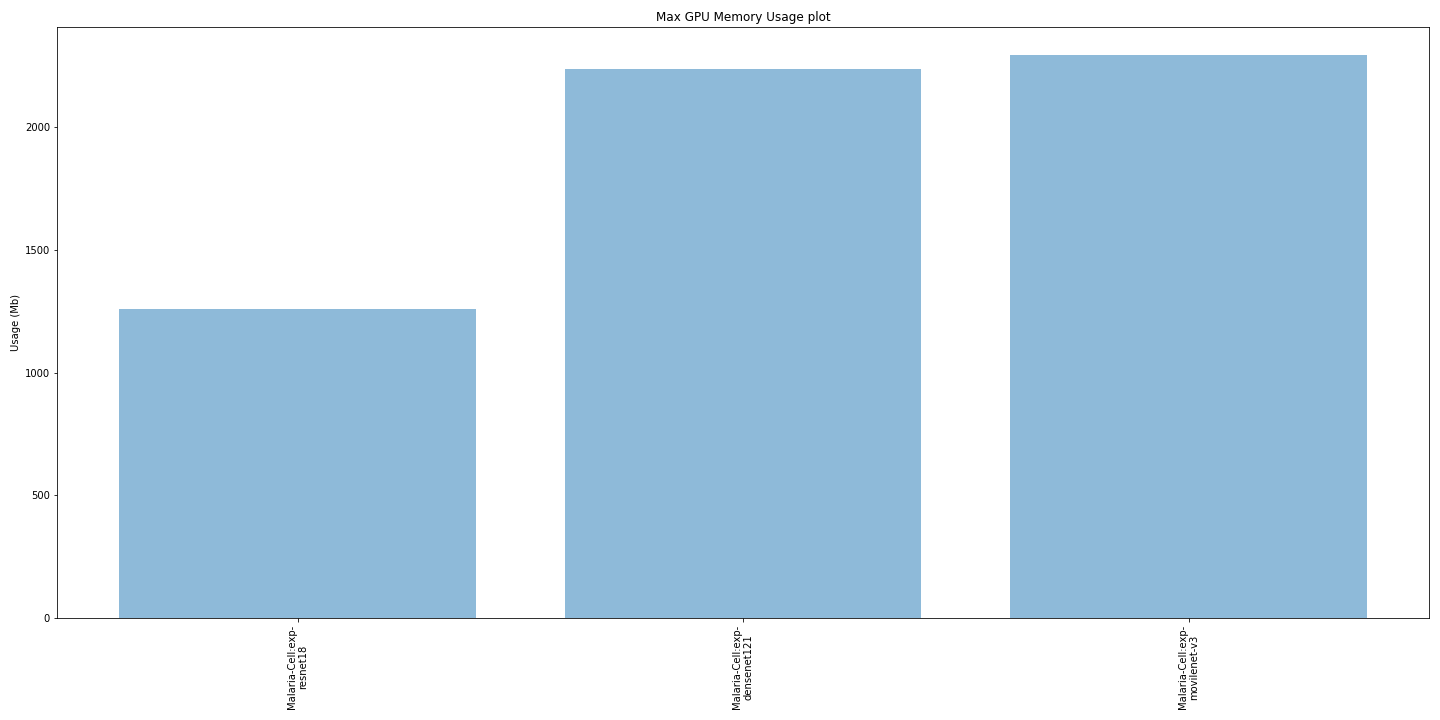

In [20]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_max_gpu_usage.png") 

### Best Validation accuracies

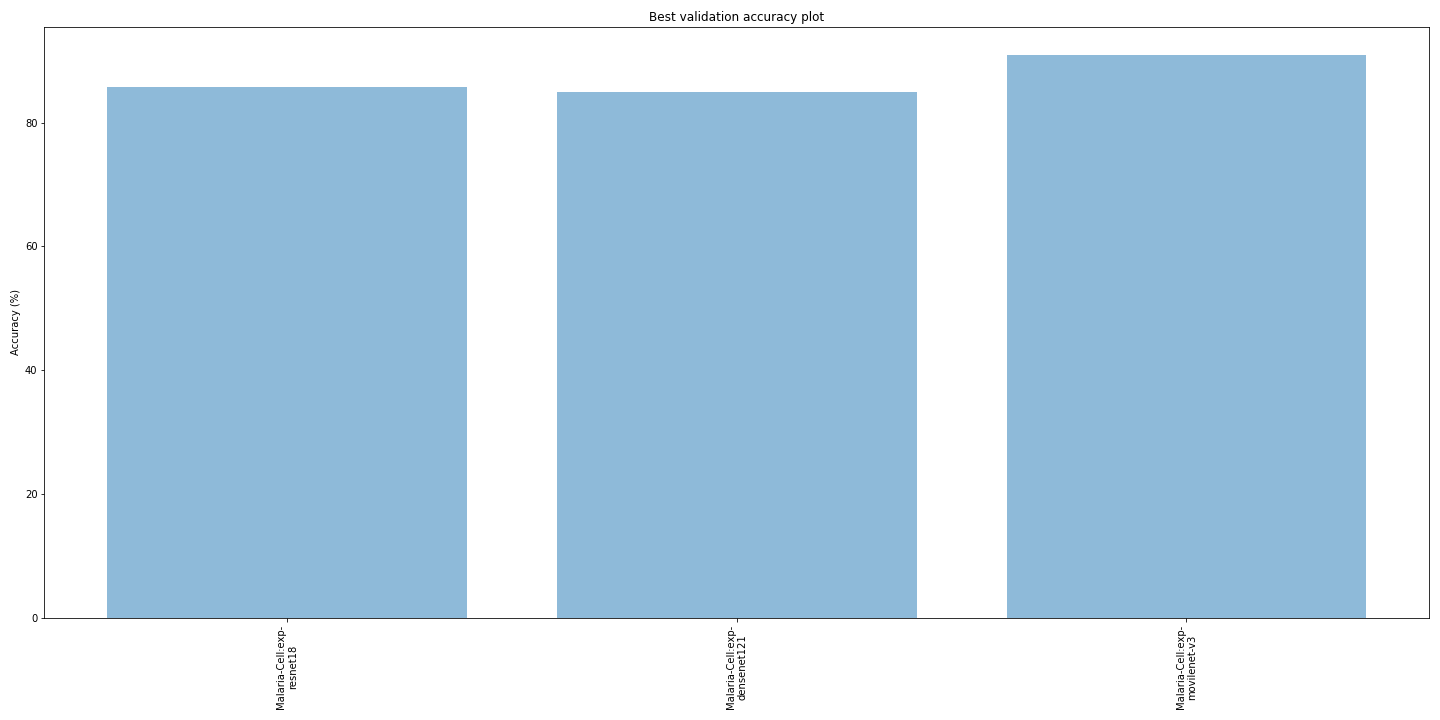

In [21]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_best_val_acc.png") 

# Goals Completed

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps learnt
    - Train three classifiers by changing parameter - base mode
    - Compare the three experiments